# Netflix Movies And TV Shows

Netflix is a global streaming service that offers a wide range of movies, 
TV shows, documentaries, and other forms of entertainment. It was 
founded in 1997 as a DVD rental service but later transitioned into a 
streaming platform, becoming one of the pioneers in the industry. 
Netflix allows subscribers to access its vast library of content on various 
devices, including smartphones, tablets, computers, smart TVs, and 
streaming media players. One of the key features that sets Netflix apart 
is its emphasis on personalization.

## Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

## Read the Dataset

In [5]:
data =  pd.read_csv('Netflix.csv')

In [6]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## Access the First 5 rows of a Dataframe

In [7]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Access the Last 5 rows of a Dataframe

In [8]:
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


## Print information about the DataFrame

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Dimension of the Dataset

In [10]:
data.shape

(8807, 12)

## Checking the data type for each column

In [11]:
data.duplicated().sum()

0

In [12]:
data.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [13]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## Checking for null values

In [14]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<AxesSubplot:>

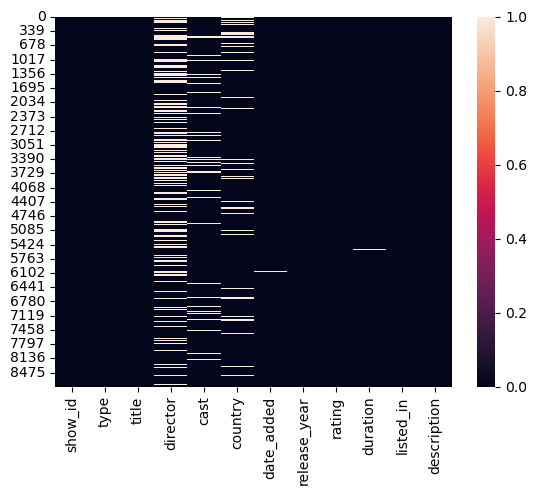

In [15]:
sns.heatmap(data.isnull())

In [16]:
data.dropna(how='any',inplace=True)
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [17]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [18]:
data["type"].value_counts()

Movie      5185
TV Show     147
Name: type, dtype: int64

## Distribution of Ratings by Release Year

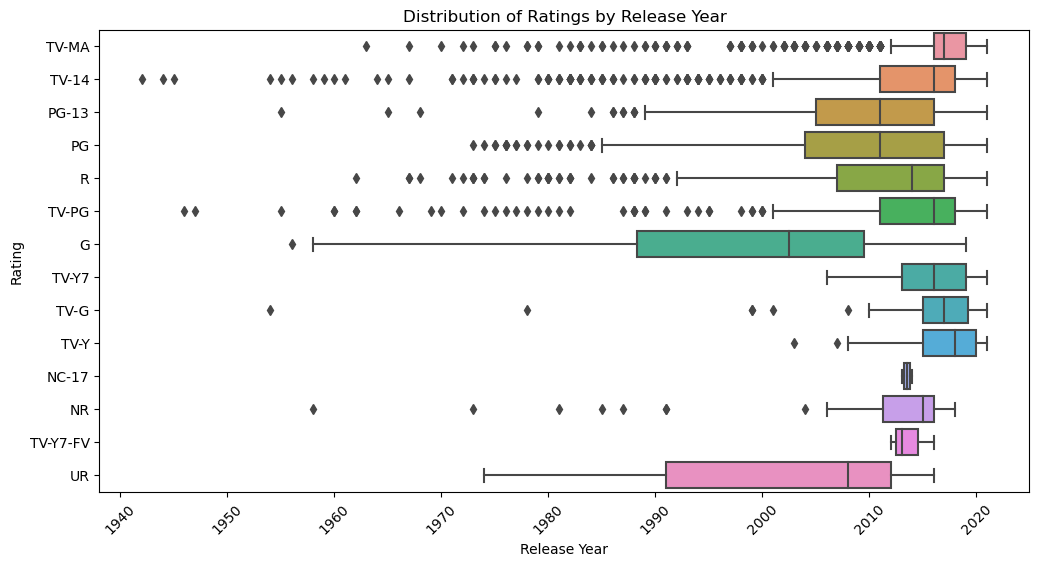

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='release_year', y='rating', data=data)
plt.title('Distribution of Ratings by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

## Analysis of Top 10 Genres with Most Titles

In [20]:
sns.set_style('darkgrid')

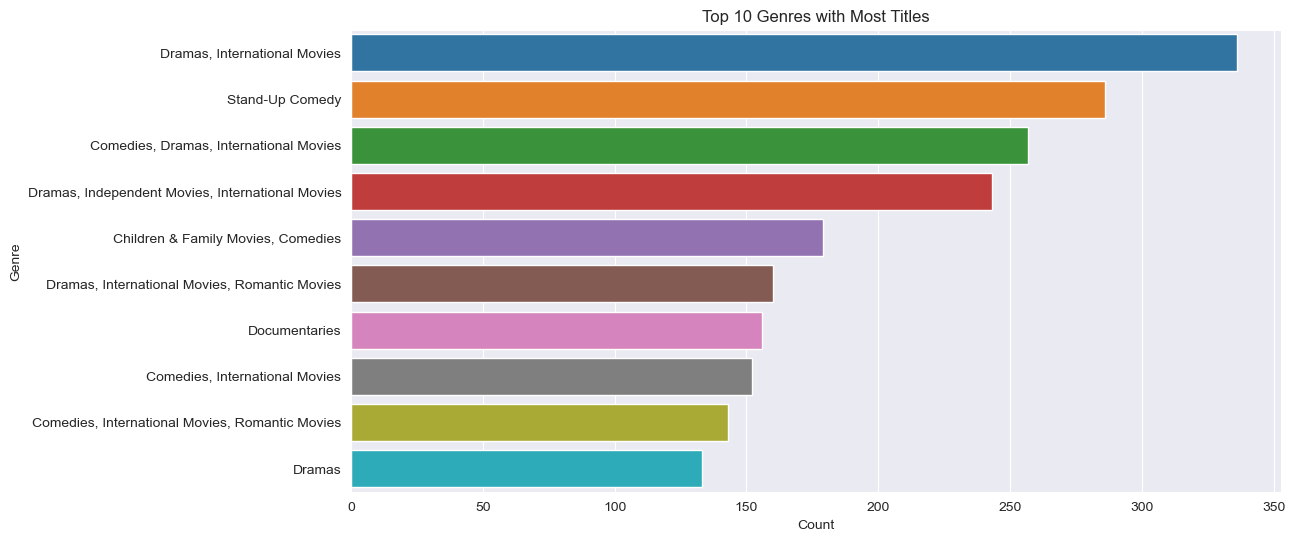

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(y='listed_in', data=data, order=data['listed_in'].value_counts().index[:10])
plt.title('Top 10 Genres with Most Titles')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

## OBSERVATION
          Among the top 10 genres, dramas and international movies have the highest number of titles

## Distribution of Movies and TV Shows

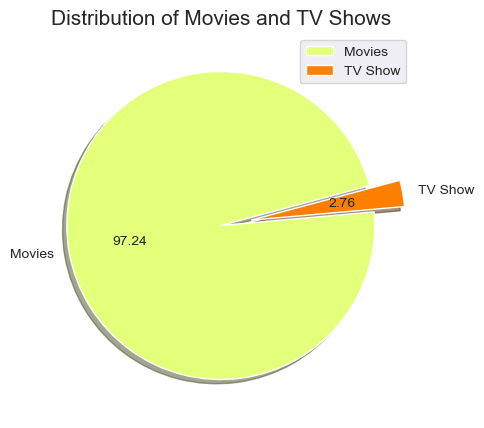

In [22]:
labels = ["Movies", "TV Show"]
size = data["type"].value_counts()
colors = plt.cm.Wistia(np.linspace(0,1,2))
explode= [0, 0.2]
plt.rcParams["figure.figsize"] = (5,5)
plt.pie(size,labels = labels, colors= colors, explode = explode, shadow= True, startangle=15,autopct="%1.2f")
plt.title("Distribution of Movies and TV Shows", fontsize=15)
plt.legend()
plt.show()

In [23]:
data[(data['type']=='TV Show') & (data['country']=='United States')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
380,s381,TV Show,The Flash,Glen Winter,"Grant Gustin, Candice Patton, Danielle Panabak...",United States,"July 28, 2021",2021,TV-14,7 Seasons,"Crime TV Shows, TV Action & Adventure, TV Sci-...",A forensics expert who wakes from a coma with ...
676,s677,TV Show,Riverdale,Rob Seidenglanz,"K.J. Apa, Lili Reinhart, Camila Mendes, Cole S...",United States,"June 19, 2021",2019,TV-14,4 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries","While navigating the troubled waters of sex, r..."
723,s724,TV Show,The American Bible Challenge,Michael Simon,Jeff Foxworthy,United States,"June 15, 2021",2014,TV-G,1 Season,Reality TV,Join host Jeff Foxworthy as contestants test t...
726,s727,TV Show,Metallica: Some Kind of Monster,"Joe Berlinger, Bruce Sinofsky","James Hetfield, Lars Ulrich, Kirk Hammett, Rob...",United States,"June 13, 2021",2014,TV-MA,1 Season,TV Shows,This collection includes the acclaimed rock do...
879,s880,TV Show,Halston,Daniel Minahan,"Ewan McGregor, Bill Pullman, Rebecca Dayan, Da...",United States,"May 14, 2021",2021,TV-MA,1 Season,TV Dramas,His name built an empire. His style defined an...
1042,s1043,TV Show,Garth Brooks: The Road I’m On,Glenn Weiss,Garth Brooks,United States,"April 15, 2021",2019,TV-PG,1 Season,Docuseries,Revealing interviews and archive footage tell ...
1530,s1531,TV Show,Schulz Saves America,Alexx Media,Andrew Schulz,United States,"December 17, 2020",2020,TV-MA,1 Season,"Stand-Up Comedy & Talk Shows, TV Comedies",Comedian Andrew Schulz takes on the year's mos...
2022,s2023,TV Show,Julie and the Phantoms,Kenny Ortega,"Madison Reyes, Charlie Gillespie, Owen Patrick...",United States,"September 10, 2020",2020,TV-G,1 Season,"Kids' TV, TV Comedies",Julie lost her passion for music when she lost...
2405,s2406,TV Show,DC's Legends of Tomorrow,Rob Seidenglanz,"Victor Garber, Brandon Routh, Caity Lotz, Fran...",United States,"June 10, 2020",2020,TV-14,5 Seasons,"TV Action & Adventure, TV Sci-Fi & Fantasy","A mysterious ""time master"" from the future uni..."
2470,s2471,TV Show,Supergirl,Jesse Warn,"Melissa Benoist, Mehcad Brooks, Chyler Leigh, ...",United States,"May 25, 2020",2019,TV-14,5 Seasons,"TV Action & Adventure, TV Sci-Fi & Fantasy","To avert a disaster, Kara Danvers reveals her ..."


## 5 Countries Produce the more content

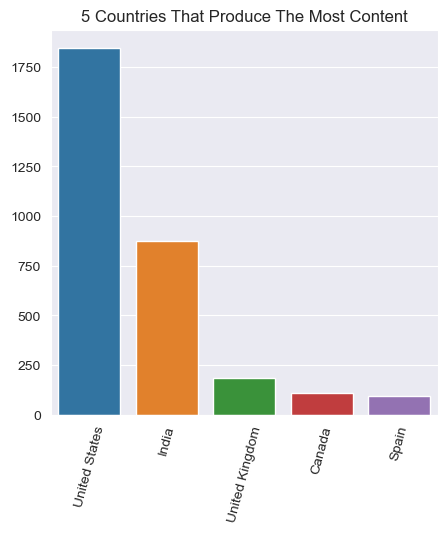

In [24]:
top_countries = data["country"].value_counts().head(5)
sns.barplot(x = top_countries.index, y = top_countries.values)
plt.xticks(rotation=75)
plt.title("5 Countries That Produce The Most Content")
plt.show()

## Rating

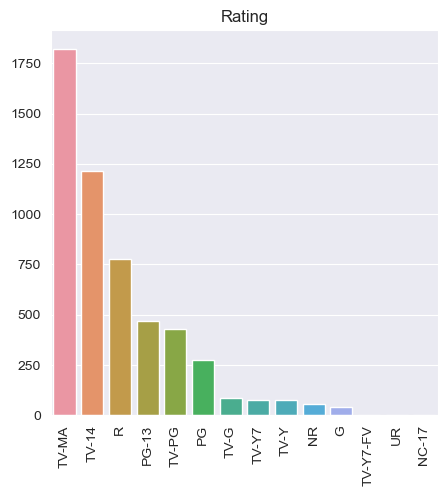

In [25]:
rate = data["rating"].value_counts()
sns.barplot(x = rate.index, y = rate.values)
plt.xticks(rotation=90)
plt.title("Rating")
plt.show()

According to the graphic, the content with the highest rating was TV-MA, that is, content that appeals to adults only. G, that is, the number of movies/series suitable for general audiences seems quite low. It seems that netflix generally broadcasts content that can be watched by adults.

## Ratings by type

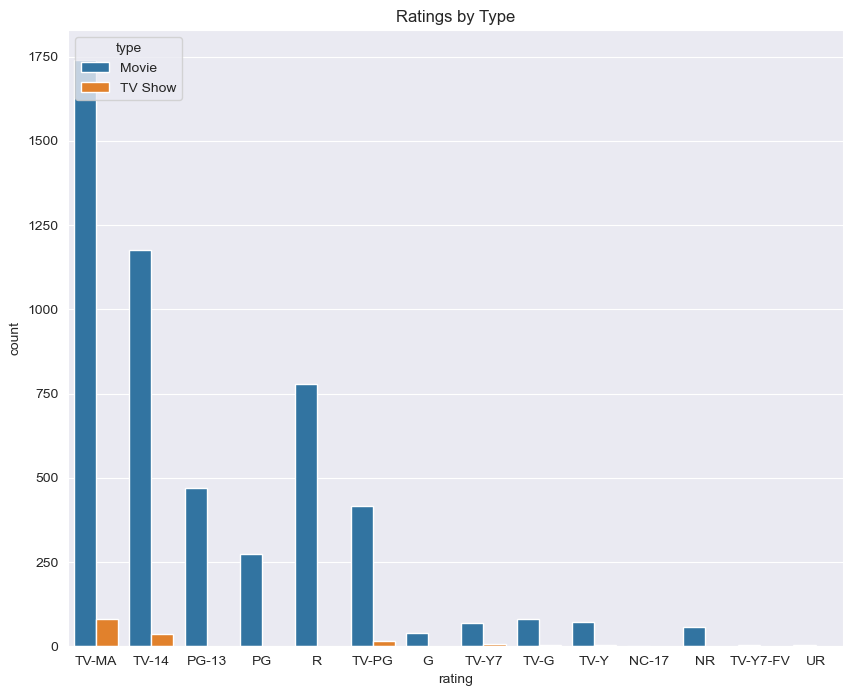

In [26]:
plt.figure(figsize =(10,8))
sns.countplot(x = "rating", hue = "type", data=data)
plt.title("Ratings by Type")
plt.show()

TV-MA, that is, the number of movies appealing only to adults is higher than the number of TV Shows.

In [27]:
data.sort_values(by= "release_year", ascending= True).reset_index().head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...
1,8640,s8641,Movie,Tunisian Victory,"Frank Capra, John Huston, Hugh Stewart, Roy Bo...",Burgess Meredith,"United States, United Kingdom","March 31, 2017",1944,TV-14,76 min,"Classic Movies, Documentaries",British and American troops join forces to lib...
2,7219,s7220,Movie,Know Your Enemy - Japan,"Frank Capra, Joris Ivens","Walter Huston, Dana Andrews",United States,"March 31, 2017",1945,TV-14,63 min,"Classic Movies, Documentaries",Though culturally insensitive by modern standa...
3,7294,s7295,Movie,Let There Be Light,John Huston,Walter Huston,United States,"March 31, 2017",1946,TV-PG,58 min,"Classic Movies, Documentaries",Some returning combat veterans suffer scars th...
4,8587,s8588,Movie,Thunderbolt,"William Wyler, John Sturges","James Stewart, Lloyd Bridges",United States,"March 31, 2017",1947,TV-PG,42 min,"Classic Movies, Documentaries",A P-47 Thunderbolt squadron is shown in prepar...


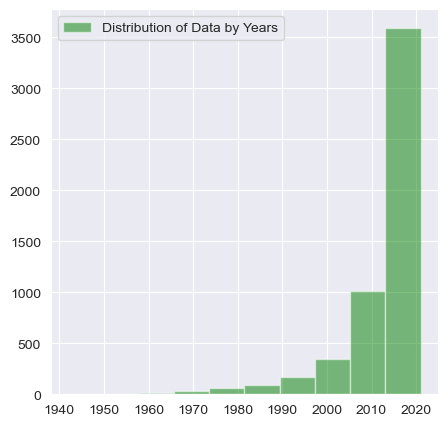

In [28]:
plt.hist(data["release_year"], bins = 10, alpha = 0.5,
color="green", label = "Distribution of Data by Years")
plt.legend()
plt.show()

We can understand the distribution of the data by years more clearly with the histogram graph. We can say that most data has been extracted in the last 10 years

In [29]:
data.nsmallest(1,'release_year').reset_index()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...


In [30]:
data.nlargest(1,'release_year').reset_index()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [31]:
# Find all the instances where: Type is 'Movie' and listed_in is 'Dramas' 

data[(data['type'] == 'Movie') & (data['listed_in'] == 'Dramas')].head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
129,s130,Movie,An Unfinished Life,Lasse Hallström,"Robert Redford, Jennifer Lopez, Morgan Freeman...","Germany, United States","September 1, 2021",2005,PG-13,108 min,Dramas,A grieving widow and her daughter move in with...
142,s143,Movie,Freedom Writers,Richard LaGravenese,"Hilary Swank, Patrick Dempsey, Scott Glenn, Im...","Germany, United States","September 1, 2021",2007,PG-13,124 min,Dramas,While her at-risk students are reading classic...
162,s163,Movie,Marshall,Reginald Hudlin,"Chadwick Boseman, Josh Gad, Kate Hudson, Sterl...","United States, China, Hong Kong","September 1, 2021",2017,PG-13,118 min,Dramas,"This biopic of Thurgood Marshall, the first Bl..."


In [32]:
drama_movies = data[(data['type'] == 'Movie') & (data['listed_in'] == 'Dramas')]
drama_movies.reset_index().head(2)

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,129,s130,Movie,An Unfinished Life,Lasse Hallström,"Robert Redford, Jennifer Lopez, Morgan Freeman...","Germany, United States","September 1, 2021",2005,PG-13,108 min,Dramas,A grieving widow and her daughter move in with...
1,142,s143,Movie,Freedom Writers,Richard LaGravenese,"Hilary Swank, Patrick Dempsey, Scott Glenn, Im...","Germany, United States","September 1, 2021",2007,PG-13,124 min,Dramas,While her at-risk students are reading classic...


In [33]:
drama_tvshows= data[(data['type'] == 'TV Show') & (data['listed_in'] == 'Dramas')]
drama_tvshows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [34]:
data1 = data.groupby("type")["listed_in"].count()
data1

type
Movie      5185
TV Show     147
Name: listed_in, dtype: int64

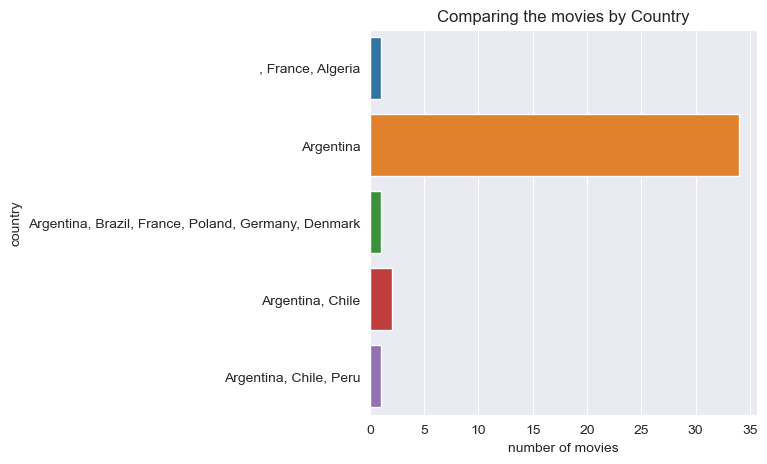

In [36]:
#Comparing the movies by Country:
data[data["type"]=="Movie"].groupby(["country"]).size().reset_index(name="number of movies")
compare_country=data[data["type"]=="Movie"].groupby(["country"]).size().reset_index(name="number of movies").head(5)
sns.barplot(data = compare_country ,
x="number of movies", y="country")
plt.title("Comparing the movies by Country")
plt.show()

When we compare the number of films released by countries, we can say that Argentina has released more films compared to other countries.

In [37]:
#Comparing the first 5 directors who have released the most TV-shows and movies, the number of TV-shows and movies they have released:
popular_director=data.groupby(["director","type"]).size().reset_index(name="number of movies and TV shows")
popular_director.sort_values(by="number of movies and TV shows",ascending=False).head(5).reset_index()

,index,director,type,number of movies and TV shows
0,3008,"Raúl Campos, Jan Suter",Movie,18
1,1566,Jay Karas,Movie,14
2,2267,Marcus Raboy,Movie,14
3,599,Cathy Garcia-Molina,Movie,13
4,3921,Youssef Chahine,Movie,12


The 5 directors who produced the most TV shows and movies worked on movies instead of TV shows.

Netflix company has released more movie content than tv show. We see that the country that produces the most content is the US. If we examine it only on the movie scale, Argentina comes first.If we compare the content published in Netflix company, the number of content that appeals to adults is more.When we examine the content distribution by years, we see that the number of content production for this sector has increased in recent years. In particular, the directors preferred making movies to TV-shows.We see that the number of movies in the drama genre is much higher than TV shows.

## Creation of a Model

## Convert  categorical variables into a numeric format

In [38]:
data['type'].replace({'Movie':1,'TV Show':0},inplace=True)

In [39]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,1,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,0,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,1,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,1,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,1,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,1,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,1,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,1,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,1,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [40]:
data.rating.value_counts()

TV-MA       1822
TV-14       1214
R            778
PG-13        470
TV-PG        431
PG           275
TV-G          84
TV-Y7         76
TV-Y          76
NR            58
G             40
TV-Y7-FV       3
UR             3
NC-17          2
Name: rating, dtype: int64

## Label Encoder

In [41]:
le = LabelEncoder()

In [42]:
data['description']=le.fit_transform(data.description)
data['show_id']=le.fit_transform(data.show_id)
data['title']=le.fit_transform(data.title)
data['director']=le.fit_transform(data.director)
data['cast']=le.fit_transform(data.cast)
data['country']=le.fit_transform(data.country)
data['rating']=le.fit_transform(data.rating)
data['duration']=le.fit_transform(data.duration)
data['listed_in']=le.fit_transform(data.listed_in)
data['date_added']=le.fit_transform(data.date_added)

In [43]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,4632,1,3686,1309,2721,536,1405,1993,8,27,238,3389
8,5264,0,4399,256,3253,409,1405,2021,6,187,89,795
9,0,1,4733,3619,3259,490,1405,2021,4,5,156,920
12,176,1,2155,695,2987,167,1400,2021,8,29,245,1353
24,963,1,2157,3183,3843,195,1391,1998,6,72,179,5063
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,5250,1,5305,2201,273,403,979,2015,8,194,251,3558
8802,5251,1,5308,857,3135,490,1153,2007,5,64,205,604
8804,5252,1,5310,3164,2203,490,1107,2009,5,185,166,3224
8805,5253,1,5312,2817,4806,490,511,2006,3,185,97,2210


In [44]:
data.dtypes

show_id         int32
type            int64
title           int32
director        int32
cast            int32
country         int32
date_added      int32
release_year    int64
rating          int32
duration        int32
listed_in       int32
description     int32
dtype: object

## Take x and y

In [45]:
x = data.drop(['type'],axis=1)

In [46]:
x

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,4632,3686,1309,2721,536,1405,1993,8,27,238,3389
8,5264,4399,256,3253,409,1405,2021,6,187,89,795
9,0,4733,3619,3259,490,1405,2021,4,5,156,920
12,176,2155,695,2987,167,1400,2021,8,29,245,1353
24,963,2157,3183,3843,195,1391,1998,6,72,179,5063
...,...,...,...,...,...,...,...,...,...,...,...
8801,5250,5305,2201,273,403,979,2015,8,194,251,3558
8802,5251,5308,857,3135,490,1153,2007,5,64,205,604
8804,5252,5310,3164,2203,490,1107,2009,5,185,166,3224
8805,5253,5312,2817,4806,490,511,2006,3,185,97,2210


In [47]:
type(x)

pandas.core.frame.DataFrame

In [48]:
y = data['type']

In [49]:
y

7       1
8       0
9       1
12      1
24      1
       ..
8801    1
8802    1
8804    1
8805    1
8806    1
Name: type, Length: 5332, dtype: int64

In [50]:
type(y)

pandas.core.series.Series

## Split the train and test part

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.3,random_state = 10)

In [52]:
print(x_train.shape)


(3732, 11)


## Logistic Regression

In [53]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)


LogisticRegression()

In [54]:
y_pred = lr_model.predict(x_test)
score_lr = accuracy_score(y_test,y_pred)*100
score_lr

97.8125

## Observation 

           97.81% of Accuracy in Logistic Regression Model

## RandomForest Classifier

In [55]:
model = RandomForestClassifier(n_estimators = 100,criterion='entropy',random_state=10)
model.fit(x_train,y_train)
print(model.score(x_train,y_train)*100)
print(model.score(x_test,y_test)*100)
y_predict = model.predict(x_test)
score = model.score(x_test,y_test)*100
score


100.0
99.5625


99.5625

##   Observation
    
           99% of Accuracy in RandomForest Classifier

## Decision Tree Classifier

In [56]:
DT = DecisionTreeClassifier(min_samples_leaf = 0.0001)
DT.fit(x_train,y_train)
y_predict = DT.predict(x_test)
score_dt = accuracy_score(y_test,y_predict)*100
score_dt

99.625

## Observation
          
           99.62% of Accuracy in DecisionTree Classifier

## SVM Classifier 

In [57]:
model=SVC()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
accuracy_score(y_test,y_predict)*100

97.8125

## Observation
     
           97.81% of Accuracy in SVM Classifier

## Conclusion

Netflix is a prominent streaming platform that offers a vast collection of movies and TV shows to a global audience. It has revolutionized the way people consume entertainment content by providing on-demand access to a wide range of titles across various genres.

Content Library: Netflix boasts a diverse and extensive content library, encompassing movies, TV series, documentaries, and original productions. This vast collection provides ample opportunities for analysis and exploration.

Personalization and Recommendation Systems: Netflix is renowned for its personalized recommendation system, which leverages user data and machine learning algorithms to suggest content tailored to individual preferences. Understanding and analyzing these recommendation systems can be a valuable aspect of a project.

User Behavior and Engagement: Netflix collects extensive user data, including viewing habits, ratings, and interaction patterns. Analyzing this data can provide insights into user behavior, preferences, and engagement, offering opportunities to improve user experience and engagement strategies.

Genre Analysis: Exploring the popularity, trends, and preferences within different genres can be an interesting avenue for analysis. Examining viewing patterns, ratings, and reviews for specific genres can help uncover audience preferences and provide insights into content production and acquisition strategies.

Sentiment Analysis: Analyzing user reviews and sentiments can provide valuable insights into audience reactions to specific movies and TV shows. Sentiment analysis techniques can be employed to understand user sentiment, opinions, and feedback, which can help guide content curation and decision-making processes.

Predictive Modeling: Utilizing machine learning techniques such as classification or regression models, it is possible to build predictive models for user behavior, churn prediction, or content popularity. These models can provide insights for business decisions and strategies.

Collaborative Filtering: Collaborative filtering techniques, such as user-based or item-based recommendations, can be explored to understand how Netflix leverages user interactions and preferences to make personalized recommendations.

When working on a project related to Netflix, it is crucial to carefully consider the available data, privacy concerns, and legal implications. Proper data processing, cleaning, and anonymization techniques should be applied to ensure compliance with privacy regulations and ethical considerations.

Overall, a project focused on Netflix can delve into various aspects, including content analysis, user behavior, recommendation systems, sentiment analysis, and predictive modeling. The specific scope and objectives of the project will determine the most relevant areas to explore, allowing for a deeper understanding of the platform and its impact on the streaming industry.






